<a href="https://colab.research.google.com/github/Slimani-CE/titanic-2021-dataset-analyse/blob/main/Titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the libraries

In [37]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

##Importing the dataset

In [38]:
dataset = pd.read_csv('train.csv')
testset = pd.read_csv('test.csv')
test_ids = testset['PassengerId']

## Data analyse

In [39]:
dataset.shape

(100000, 12)

In [40]:
dataset.sample(10, random_state = 42)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
75721,75721,1,2,"Mason, Magdalena",female,57.0,0,0,SC/AH 453040,8.32,NaN,C
80184,80184,1,3,"Norton, Christopher",male,26.0,0,0,NaN,6.17,NaN,S
19864,19864,0,3,"Senske, Cecile",female,31.0,0,0,STON/O 359725,7.47,NaN,S
76699,76699,1,2,"Benfield, Lucia",female,41.0,0,0,37102,8.16,NaN,S
92991,92991,1,2,"Moore, Barbara",female,26.0,0,0,399820,61.50,NaN,S
76434,76434,0,2,"Wilson, Bobby",male,66.0,0,2,185037,31.89,NaN,S
84004,84004,1,1,"Wengerd, Freddie",female,45.0,1,0,22927,104.46,C18331,C
80917,80917,1,2,"Harris, Dorothy",female,51.0,1,1,24413,80.72,NaN,C
60767,60767,1,2,"Carter, Sheena",female,62.0,1,1,A/5. 12831,11.33,NaN,S
50074,50074,1,2,"Ward, Mary",female,46.0,0,1,338856,33.05,NaN,C


In [41]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,49999.500000,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,28867.657797,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,24999.750000,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,49999.500000,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,74999.250000,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,99999.000000,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


In [42]:
# This list will be updating through the data analyse
FEATURES_TO_DROP = ['PassengerId']

In [43]:
CATEGORICAL_FEATURES = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

Correlation with target value

<ipython-input-44-44aa22d23b1a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = dataset.corr()['Survived'].to_frame(), annot = True)


<Axes: >

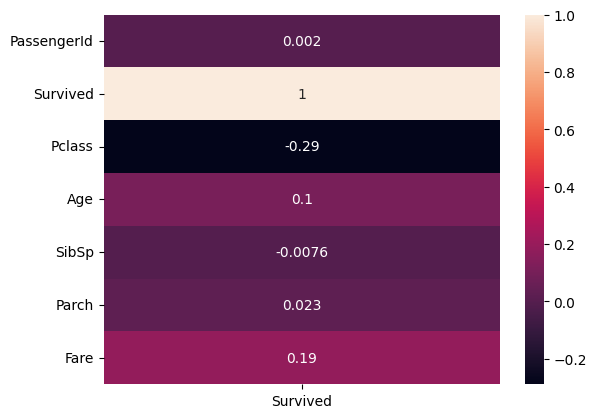

In [44]:
sns.heatmap(data = dataset.corr()['Survived'].to_frame(), annot = True)

The 'Embarked' feature and its relation with survival

In [45]:
dataset.groupby('Embarked').Survived.agg(['count', 'mean'])

,count,mean
Embarked,,
C,22187,0.751296
Q,5424,0.596976
S,72139,0.315294


The 'Sex' feature and its relation with survival

In [46]:
dataset.groupby('Sex').Survived.agg(['count', 'mean'])

,count,mean
Sex,,
female,43886,0.711525
male,56114,0.205795


The 'Ticket' feature and its relation with survival

In [47]:
dataset[['Ticket']].sample(10, random_state = 42)

,Ticket
75721,SC/AH 453040
80184,NaN
19864,STON/O 359725
76699,37102
92991,399820
76434,185037
84004,22927
80917,24413
60767,A/5. 12831
50074,338856


In [48]:
dataset.groupby('Ticket').Survived.agg(['count', 'mean']).sort_values('count', ascending = False)

,count,mean
Ticket,,
A/5,602,0.363787
C.A.,177,0.389831
SC/PARIS,145,0.448276
SOTON/O.Q.,80,0.337500
SC,57,0.491228
...,...,...
402718,1,1.000000
4027198,1,0.000000
4027354,1,0.000000


The 'Cabin' and its relation with survival

*  number of unique values

In [49]:
cabin_count = dataset['Cabin'].value_counts().to_frame()
cabin_count.columns = ['Count']
cabin_count.sort_values(by = 'Count', ascending = False)

,Count
C19828,6
B18148,5
C6906,5
C12152,5
C9485,5
...,...
E14296,1
C20307,1
C8686,1
B20342,1


*  Let's extract the prefix of each cabin and store it in a new Column called "CabinPrefix"

In [50]:
dataset['CabinPrefix'] = dataset['Cabin'].apply(lambda x : x[0] if not pd.isna(x) else x)
dataset.groupby(by = 'CabinPrefix').Survived.agg(['count', 'mean']).sort_values(by = 'count', ascending = False)

,count,mean
CabinPrefix,,
C,11825,0.712220
B,7439,0.630192
A,6307,0.274616
D,3637,0.732197
E,1749,0.617496
F,663,0.837104
G,482,0.836100
T,32,0.437500


We are going to drop the 'Cabin' since it contains more than 20000 unique value and considering the new 'CabinPrefix' column . We may have to re-analyse its affect on our predictions.

In [51]:
FEATURES_TO_DROP.append('Cabin')

We are going to drop also the 'Name'

In [52]:
FEATURES_TO_DROP.append('Name')

The 'Age' feature and its relation with the target

<Axes: xlabel='Survived', ylabel='Age'>

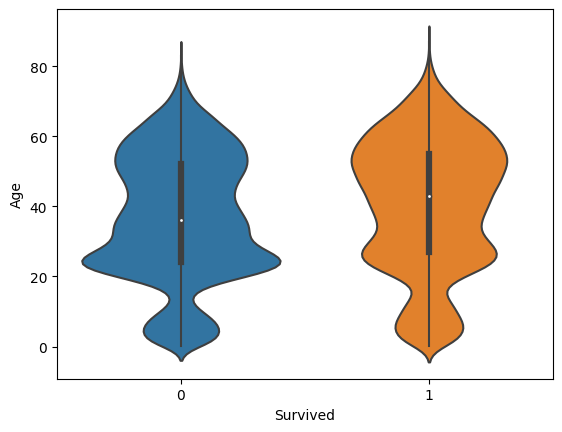

In [53]:
sns.violinplot(data = dataset, x = 'Survived', y = 'Age')

## Number of missing values

In [54]:
def display_missing_values(dataset):
  na_df = dataset.isna().sum().to_frame()
  na_df.columns = ['NA Count']
  na_df = na_df[na_df['NA Count'] != 0]
  return na_df
display_missing_values(dataset)

,NA Count
Age,3292
Ticket,4623
Fare,134
Cabin,67866
Embarked,250
CabinPrefix,67866


*  Replace missing value in 'CabinPrefix' and 'Cabin'

In [55]:
dataset['CabinPrefix'].fillna(value = 'X', inplace = True)
dataset['Cabin'].fillna(value = 'X', inplace = True)
display_missing_values(dataset)

,NA Count
Age,3292
Ticket,4623
Fare,134
Embarked,250


*  Replace the missing values in 'Embarked' with X

In [56]:
dataset['Embarked'].fillna(value = 'X', inplace = True)
display_missing_values(dataset)

,NA Count
Age,3292
Ticket,4623
Fare,134


*  Replace the missing values in 'Ticket' with a new unique value

In [57]:
dataset['Ticket'].str.contains(pat = 'X').sum()

0

In [58]:
dataset['Ticket'].fillna(value = 'X', inplace = True)
display_missing_values(dataset)

,NA Count
Age,3292
Fare,134


*  Replace the missing values in 'Fare' with the mean value

In [59]:
dataset['Fare'].fillna(value = dataset['Fare'].mean(), inplace = True)
display_missing_values(dataset)

,NA Count
Age,3292


*  Impute the missing values in 'Age' using KNN Imputer

In [60]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 3)
df_new = dataset[['Sex', 'Pclass', 'SibSp', 'Age', 'CabinPrefix']].copy()
df_new['Age'] = imputer.fit_transform(pd.get_dummies(data = df_new))

In [61]:
df_new.head()

,Sex,Pclass,SibSp,Age,CabinPrefix
0,male,1,2,1.0,C
1,male,3,0,3.0,X
2,male,3,1,3.0,X
3,male,3,0,3.0,X
4,male,3,0,3.0,X


In [62]:
dataset.update(df_new['Age'])
display_missing_values(dataset)

,NA Count


## Drop features

In [63]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinPrefix
0,0,1,1,"Oconnor, Frankie",male,1.0,2,0,209245,27.14,C12239,S,C
1,1,0,3,"Bryan, Drew",male,3.0,0,0,27323,13.35,X,S,X
2,2,0,3,"Owens, Kenneth",male,3.0,1,2,CA 457703,71.29,X,S,X
3,3,0,3,"Kramer, James",male,3.0,0,0,A. 10866,13.04,X,S,X
4,4,1,3,"Bond, Michael",male,3.0,0,0,427635,7.76,X,S,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1,2,"Bell, Adele",female,2.0,0,0,PC 15008,14.86,D17243,C,D
99996,99996,0,2,"Brown, Herman",male,2.0,0,0,13273,11.15,X,S,X
99997,99997,0,3,"Childress, Charles",male,3.0,0,0,X,9.95,X,S,X
99998,99998,0,3,"Caughlin, Thomas",male,3.0,0,1,458654,30.92,X,S,X


In [64]:
FEATURES_TO_DROP.append('Ticket')
dataset.drop(columns = FEATURES_TO_DROP, inplace = True)
dataset.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinPrefix
0,1,1,male,1.0,2,0,27.14,S,C
1,0,3,male,3.0,0,0,13.35,S,X


## Encode categorical features

In [65]:
CATEGORICAL_FEATURES = ['Sex', 'Embarked', 'CabinPrefix']

dataset = pd.get_dummies(data = dataset, columns = CATEGORICAL_FEATURES)


## Split feature matrix and target column

In [66]:
X = dataset.drop(columns = ['Survived'], axis = 1)
y = dataset['Survived']

# Logistic regression

## Splitting data into training and test set

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)

## Feature scaling

In [68]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Training the Logistic Regression model on the Training set

In [69]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

## Evaluate the model on the test set

making predections

In [70]:
y_pred = classifier.predict(X_test)

Making the Confusion Matrix

In [71]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[9043 2402]
 [2159 6396]]


Calculating the score

In [72]:
score = accuracy_score(y_pred, y_test)
print(f'score : {score}')

score : 0.77195
